In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cd D:

D:\


In [3]:
cd OneDrive/Lammps/nanoglass/20180914_800K_NPTb+800-300K_NPTb+300K_NVTb_xTen_E-2Aps/

D:\OneDrive\Lammps\nanoglass\20180914_800K_NPTb+800-300K_NPTb+300K_NVTb_xTen_E-2Aps


In [4]:
cd data_analyses/microstructure/cluster/

D:\OneDrive\Lammps\nanoglass\20180914_800K_NPTb+800-300K_NPTb+300K_NVTb_xTen_E-2Aps\data_analyses\microstructure\cluster


In [5]:
file_name = 'voronoi_800K_500.data'
csv_name = file_name[:-5] +'.csv'

In [6]:
with open(file_name) as f:
    lines = f.readlines()

In [7]:
timestep = lines[1]
num_atoms = lines[3]
x_range, y_range, z_range = lines[5:8]
items = lines[8].split(' ')
columns = items[2:]
tables = lines[9:]

In [8]:
with open(csv_name,'w') as nf:
    for char in columns:
        nf.write(char+' ')
    for lines in tables:
        nf.write(lines)

In [9]:
origin_data = pd.DataFrame(pd.read_csv(csv_name, sep='\s+'))

In [10]:
origin_data['VoronoiIndices'] = '<'+origin_data['VoronoiIndex3'].map(str) +' '+origin_data['VoronoiIndex4'].map(str) +' '+origin_data['VoronoiIndex5'].map(str) +' '+origin_data['VoronoiIndex6'].map(str)+'>' 

In [11]:
data = origin_data.drop(['VoronoiIndex3','VoronoiIndex4','VoronoiIndex5','VoronoiIndex6'],axis='columns')

In [12]:
y_lower = (data.y.max()+data.y.min())*0.5 - (data.y.max()-data.y.min())*0.1

y_upper = (data.y.max()+data.y.min())*0.5 + (data.y.max()-data.y.min())*0.1

data_y = data.loc[(data.y >= y_lower) & (data.y <= y_upper)].sort_values('y')[['type','x','Coordination']]

In [13]:
bin_num = 400.
quartiles = pd.cut(data_y.x, bin_num)

In [14]:
x_dist = data_y.Coordination.groupby([data_y.type,quartiles]).mean().unstack().T.rename({1:'Cu',2:'O',3:'Zr'},axis=1)

In [15]:
x_cor = pd.Series(np.arange(bin_num))
for i in range(len(x_dist.index)):
    x_cor[i] = x_dist.index[i].mid

df1=x_dist.reset_index().sort_values('x')

df1['x_cor'] =x_cor

df2=df1.set_index('x_cor').drop('x',axis=1)

df2.to_csv(file_name[:-5]+'_coordination number.txt')


<Figure size 1800x1200 with 0 Axes>

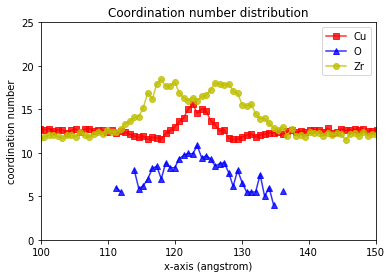

In [16]:
df3=df2

fig = plt.figure(dpi=300)

df3.plot(xlim=(100,150), ylim=(0,25),style=['rs-','b^-','yo-'],title='Coordination number distribution',alpha=0.8)
plt.xlabel('x-axis (angstrom)')
plt.ylabel('coordination number')

plt.legend(loc='best')


fig_name = file_name[:-5]+'_coordination number'+'.jpg'

plt.savefig(fig_name,dpi=300)
